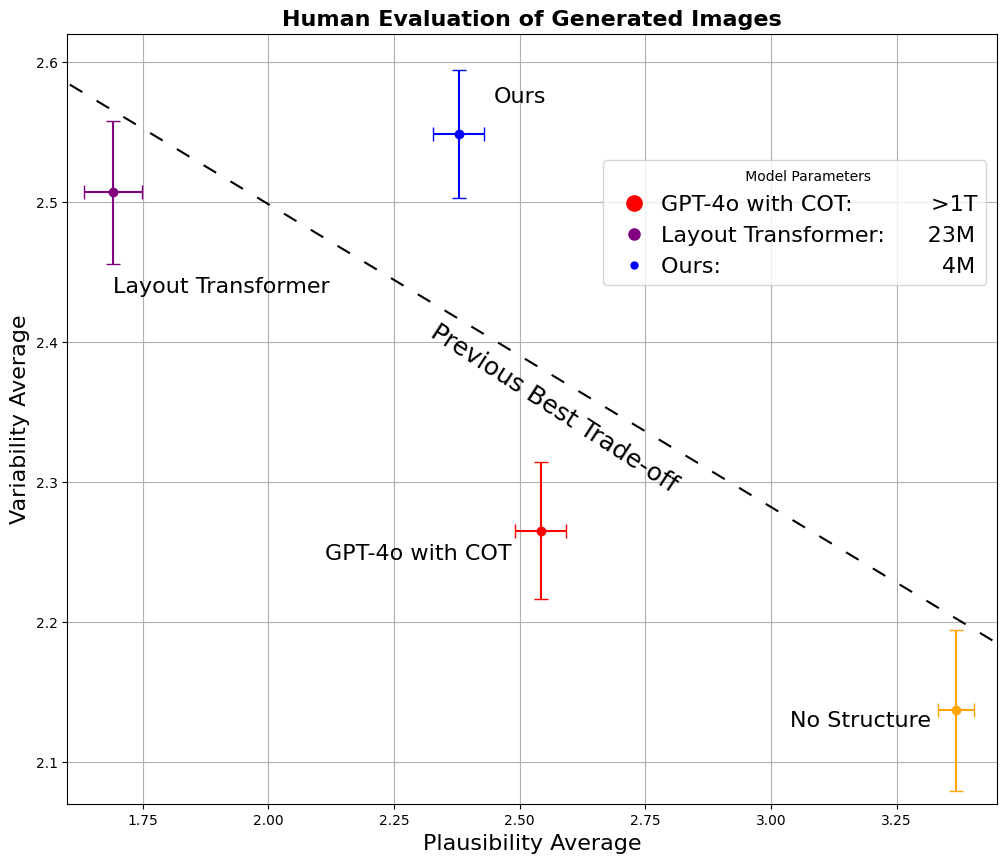

In [164]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Sample data (replace with your actual data)
models = ['Layout Transformer', 'Ours', 'GPT-4o with COT', 'No Structure']
colors = ['purple', 'blue', 'red', 'orange']
variability_avg = [2.506666666666667, 2.5483333333333333, 2.265, 2.1366666666666667]  # Y-axis data: Variability Average
plausibility_avg = [1.6905393457117595, 2.37842617152962, 2.541998231653404, 3.3687002652519893]  # X-axis data: Plausibility Average
plausibility_se = [0.057260768175959945, 0.051472873417945264, 0.05054266151889562, 0.0359111548502453]  # X-axis data: Plausibility Standard Error
variability_se = [0.05131529264516826, 0.0457832554705482, 0.04890083503036187, 0.05727112257919764]  # Y-axis data: Variability Standard Error

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Scatter plot with circle sizes proportional to the log of model size
scatter = ax.scatter(plausibility_avg, variability_avg, s=70, c='blue', alpha=0.01)



# Draw a line between two points (for example, between "Ours" and "Layout Transformer")
x1, y1 = plausibility_avg[0] - 0.0855, variability_avg[0] + 0.077  # Coordinates of "Ours"
x2, y2 = plausibility_avg[3] + 0.09, variability_avg[3] + 0.046  # Coordinates of "Layout Transformer"

# Plot the line between "Ours" and "Layout Transformer"
ax.plot([x1, x2], [y1, y2], color='black', linestyle='--', dashes=(7, 8))  


# Plot error bars for each model (both x and y errors)
for i in range(len(models)):
    ax.errorbar(plausibility_avg[i], variability_avg[i], 
                xerr=plausibility_se[i], yerr=variability_se[i], 
                fmt='o', color=colors[i], capsize=5, linestyle='None')
    
# Customize the plot
ax.set_title('Human Evaluation of Generated Images', fontsize=16, fontweight='bold')
ax.set_xlabel('Plausibility Average', fontsize=16)
ax.set_ylabel('Variability Average', fontsize=16)

# Create custom legend handles with colors
legend_elements = [
    Line2D([0], [0], marker='o', color='red', markersize=11, linestyle='None', label="GPT-4o with COT:           >1T"),
    Line2D([0], [0], marker='o', color='purple', markersize=8, linestyle='None', label="Layout Transformer:      23M"),
    Line2D([0], [0], marker='o', color='blue', markersize=5, linestyle='None', label="Ours:                               4M")
]

# Display the custom legend in the top right
plt.legend(handles=legend_elements, loc="upper right", title="      Model Parameters", frameon=True, 
            bbox_to_anchor=(1, 0.85),labelspacing=0.5, handletextpad=0.2, fontsize=16)  # Reduce space between marker and text)
    
# Add text annotations for the models (adjusting the position to avoid overlap)
ax.text(plausibility_avg[0], variability_avg[0]-0.06, models[0], fontsize=16, ha='left', va='top')
ax.text(plausibility_avg[1]+0.07, variability_avg[1]+0.02, models[1], fontsize=16, ha='left', va='bottom')

ax.text(plausibility_avg[3]-0.05, variability_avg[3]+0.0002, models[3], fontsize=16, ha='right', va='top')
# Limit the axes to avoid excessive empty space
ax.set_xlim(1.6, 3.45)
ax.set_ylim(2.07, 2.62)
# Show grid
ax.grid(True)


# Calculate the slope angle for the text rotation
angle = np.degrees(np.arctan2(y2 - y1-0.8, x2 - x1))

# Add the text along the line
ax.text(
    (x1 + x2) / 2 +0.05,  # X position: midpoint of the line
    (y1 + y2) / 2 -0.023,  # Y position: midpoint, slightly below the line
    "Previous Best Trade-off",
    rotation=angle,        # Rotate text to match line slope
    rotation_mode='anchor', # Ensures text rotation starts from anchor point
    ha='center',            # Center horizontally
    va='top',               # Align text just below the line
    fontsize=18,             # Adjust font size as needed
    color='black'
)
ax.text(plausibility_avg[2]-0.43, variability_avg[2]-0.009, models[2], fontsize=16, ha='left', va='top')
# Show the plot without grid
plt.show()


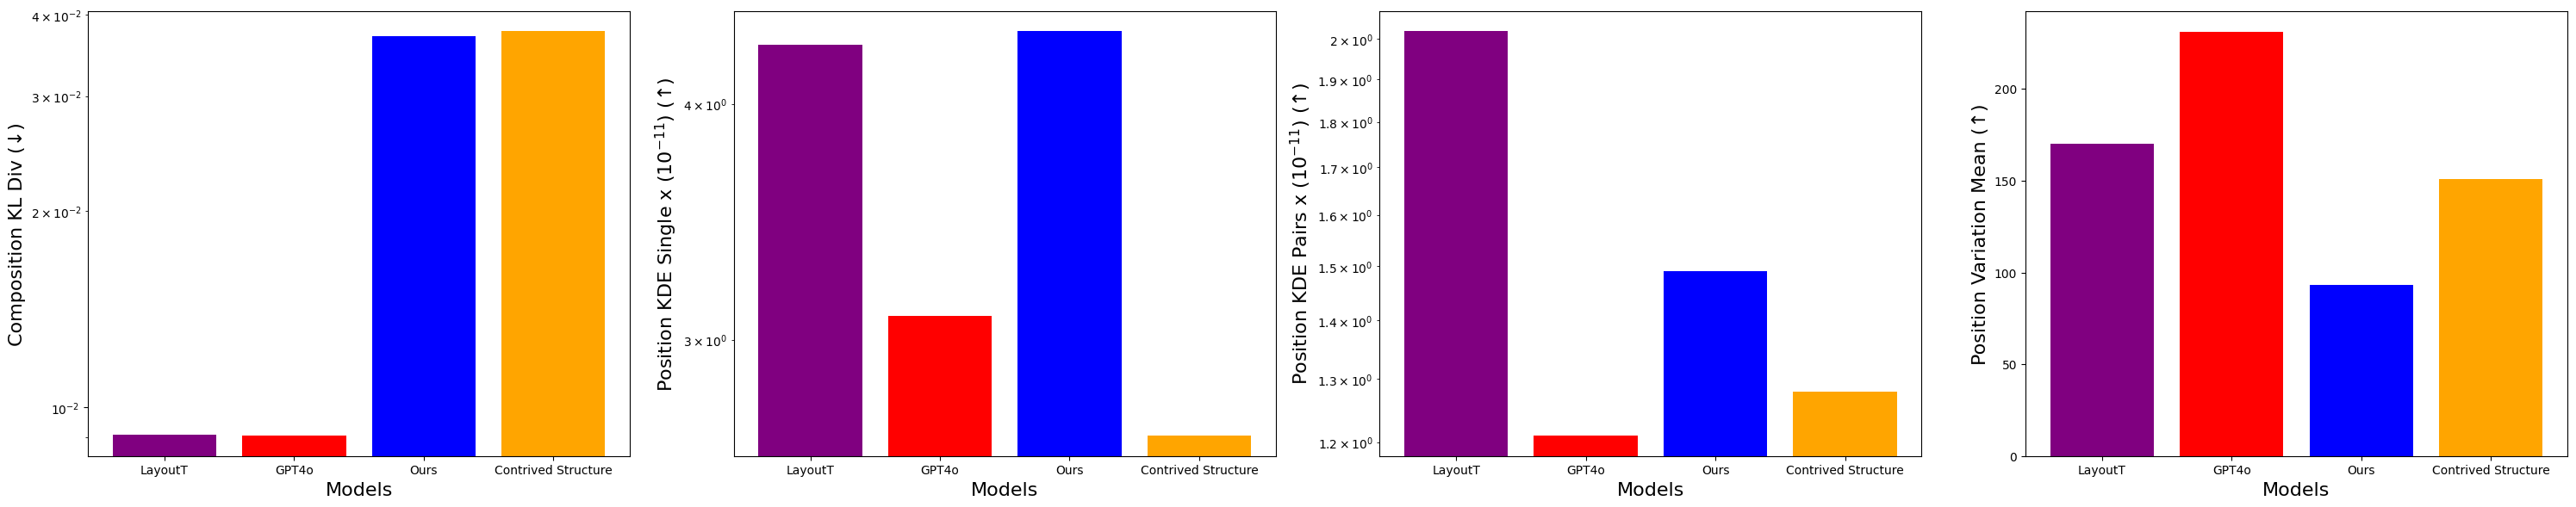

In [200]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
from matplotlib.ticker import StrMethodFormatter, NullFormatter


# Data based on the provided table (model names and values)
metrics = [ 'Composition KL Div (↓)','Position KDE Single x ($\t 10^{-11}$) (↑)', 'Position KDE Pairs x ($\t 10^{-11}$) (↑)', 'Position Variation Mean (↑)']

layout_t = [9.05e-3, 3.09, 1.21, 231]
gpt4o = [37.07e-3, 4.37, 1.49, 93.28]
ours = [9.07e-3, 4.30, 2.02, 170]
contrived_structure = [37.76e-3, 2.67, 1.28, 151]

# Organizing the data into one matrix
data = np.array([ours, layout_t, gpt4o, contrived_structure])

# Colors for each model
colors = ['purple', 'red', 'blue', 'orange']


# Plotting
fig, axes = plt.subplots(1, len(metrics), figsize=(30, 6))  # Arrange bars in a row

#ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#ax.ticklabel_format(style='plain', axis='y')  # Ensure plain format (no scientific notation)
from matplotlib.ticker import FormatStrFormatter
 
for i, metric in enumerate(metrics):
    axes[i].bar(range(4), data[:, i], color=colors, tick_label=['LayoutT', 'GPT4o', 'Ours', 'Contrived Structure'])
    #axes[i].set_title(metric)
    axes[i].yaxis.set_major_formatter(lambda x, pos: f'{x:.1f}')
    axes[i].set_xlabel('Models', fontsize=16)
    axes[i].set_ylabel(metrics[i], fontsize=16)
    
    axes[i].set_yscale('log' if i < 3 else 'linear')  # Apply log scale for small values

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

